# **Text Classification using Naive Bayes and Sentiment Analysis on Blog Posts**

# 1. Data Exploration and Preprocessing

In [ ]:
# Step 1: Load the dataset and explore its structure.
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/blogs.csv')

# Display the first few rows of the dataset
print(df.head())



                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [ ]:
# Step 2: Preprocess the text data by cleaning it.(Convert text to lowercase,Remove punctuation and special characters,Tokenize the text,Remove stopwords)
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Preprocess function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords((common words like 'the', 'is' that don’t add much meaning))
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to the 'Data' column
df['cleaned_data'] = df['Data'].apply(preprocess_text)





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Step 3: Convert the text data into a numerical format using TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features based on your dataset size

# Transform the text data
X = tfidf.fit_transform(df['cleaned_data']).toarray()

# The target labels (categories)
y = df['Labels']

# 2. Naive Bayes Model for Text Classification

In [ ]:
# Step 1: Split the data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 2: Train a Naive Bayes classifier and make predictions.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)


# 3. Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis on the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Display sentiment distribution
print(df['Sentiment'].value_counts())


Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


# Sentiment Distribution


Sentiment distribution across all categories


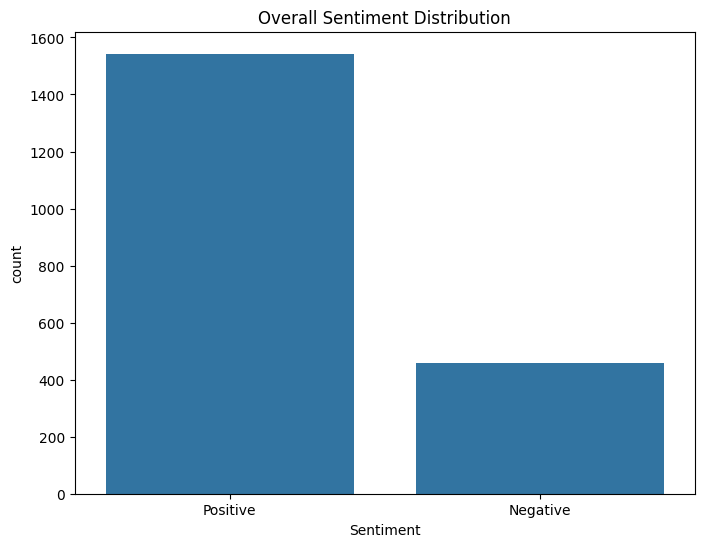


Sentiment distribution within each category


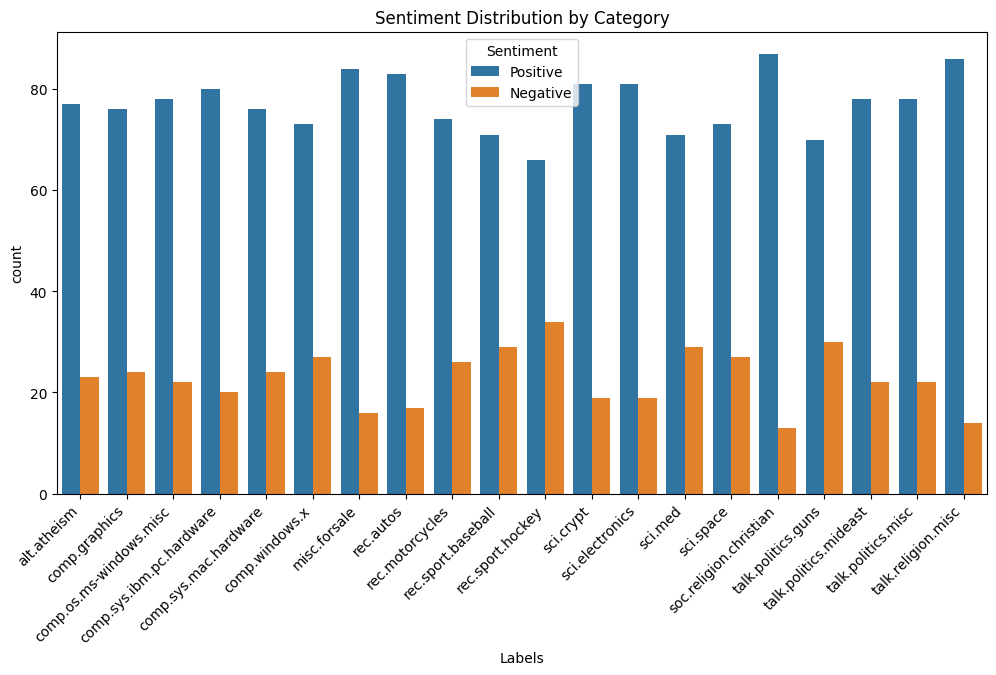

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution across all categories
print("\nSentiment distribution across all categories")
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Overall Sentiment Distribution')
plt.show()

# Sentiment distribution within each category
print("\nSentiment distribution within each category")
plt.figure(figsize=(12, 6))
sns.countplot(x='Labels', hue='Sentiment', data=df)
plt.title('Sentiment Distribution by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Group by categories and sentiment
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack()
print(sentiment_distribution)


Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


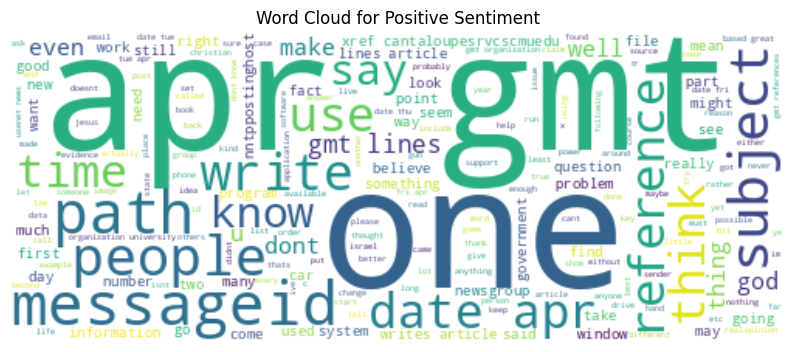

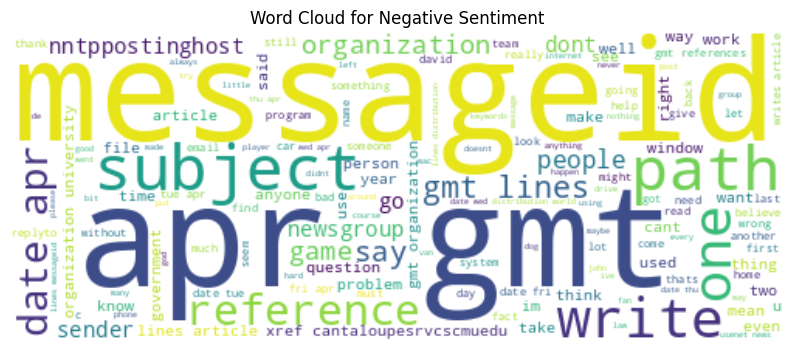

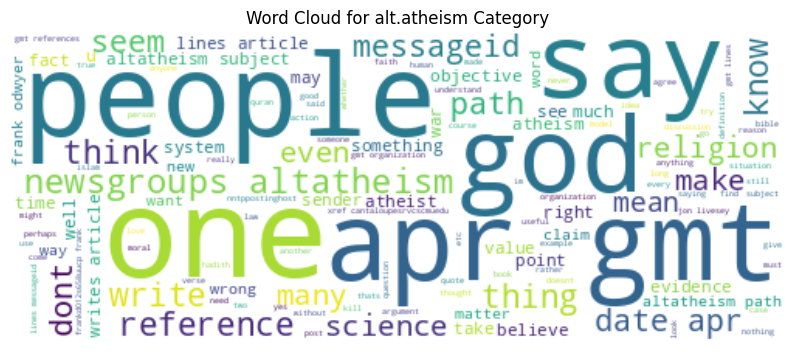

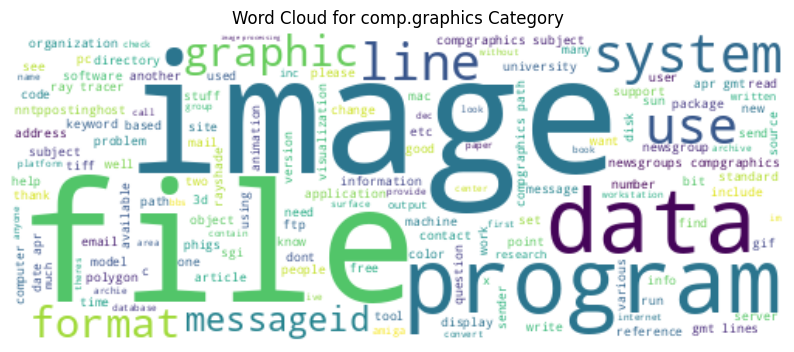

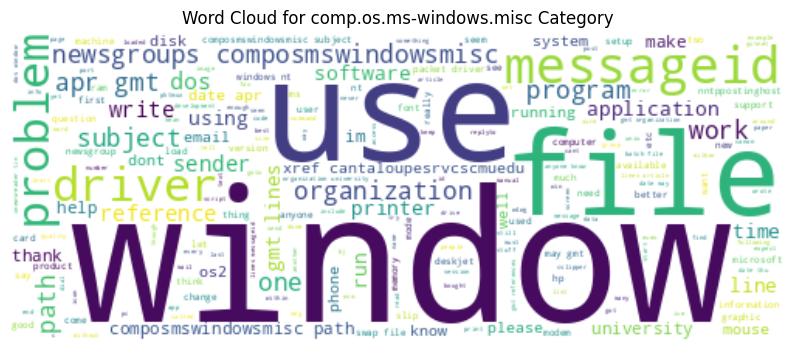

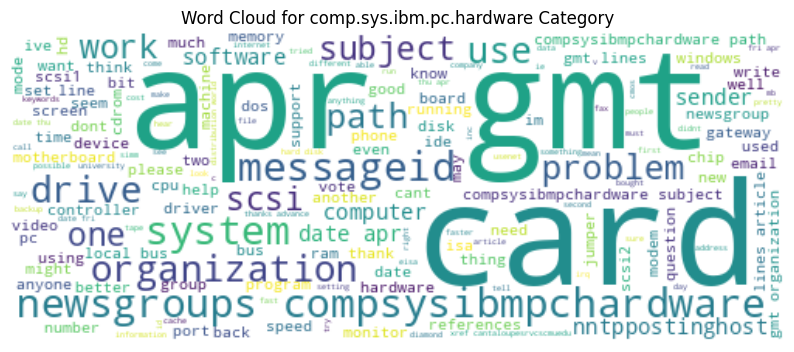

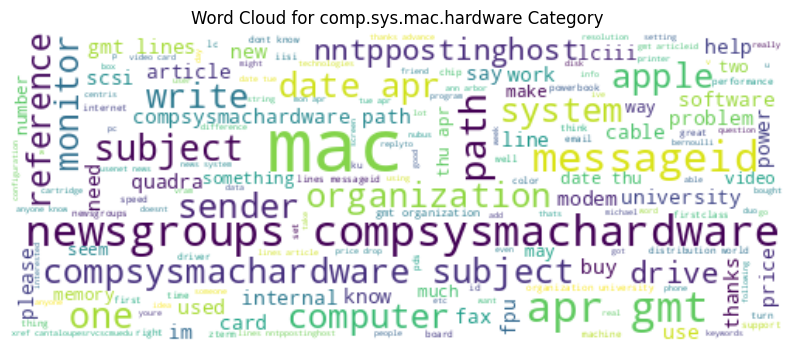

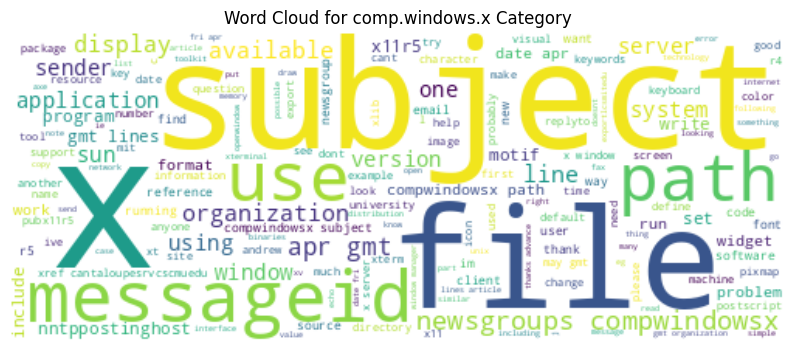

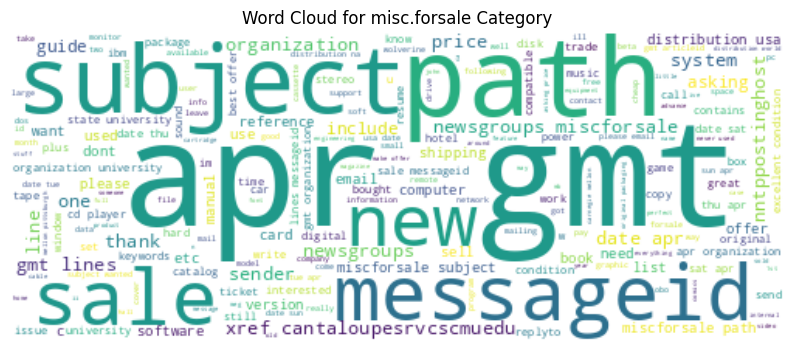

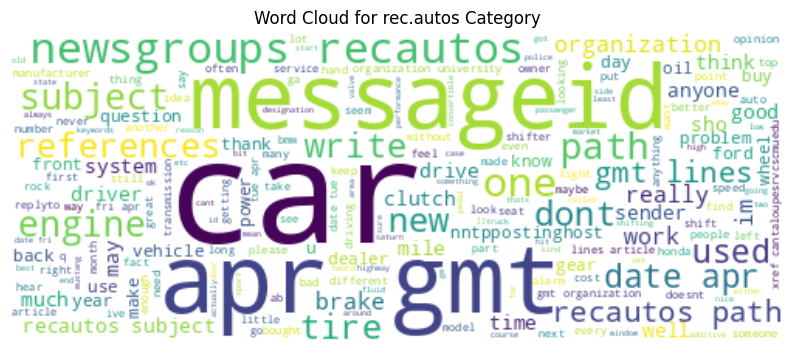

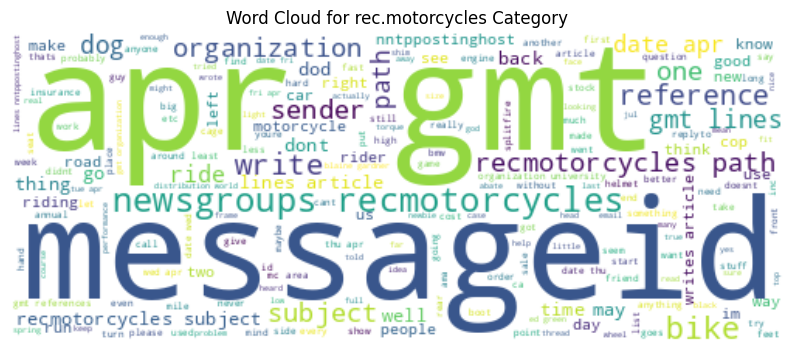

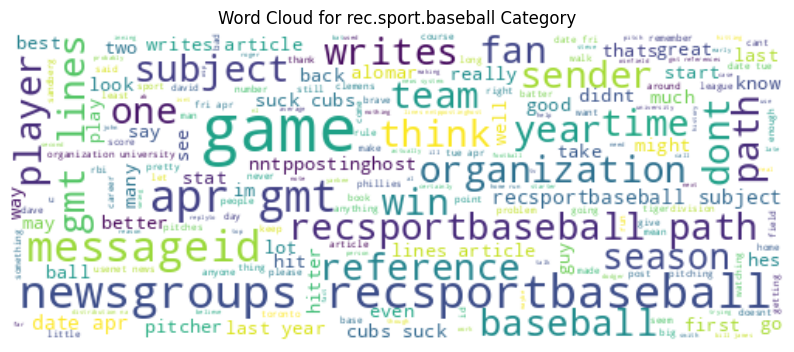

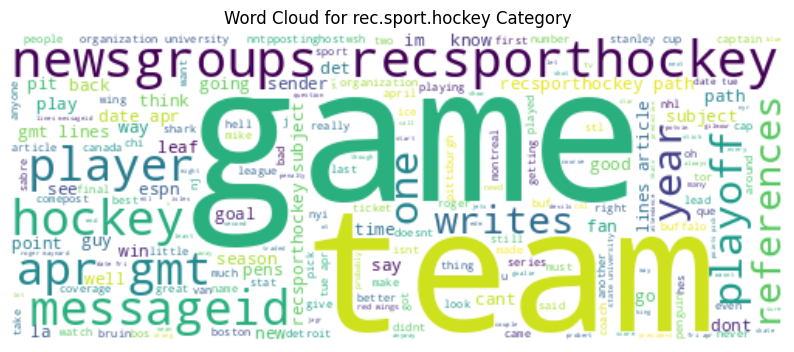

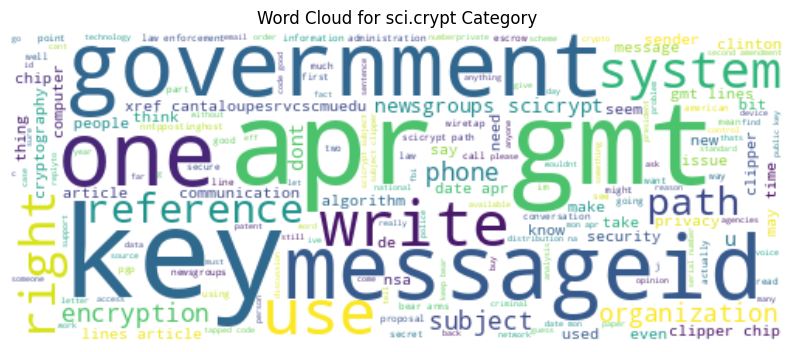

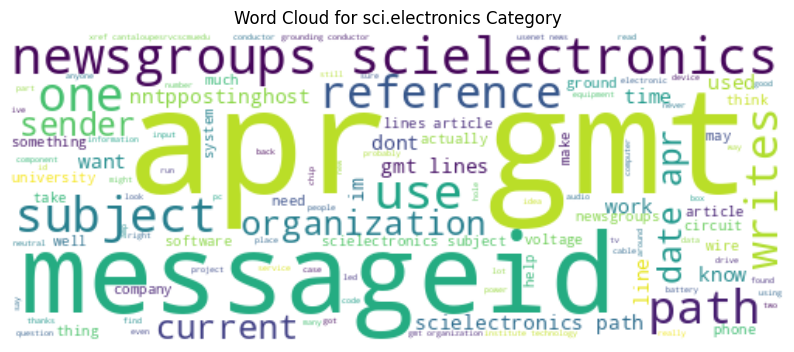

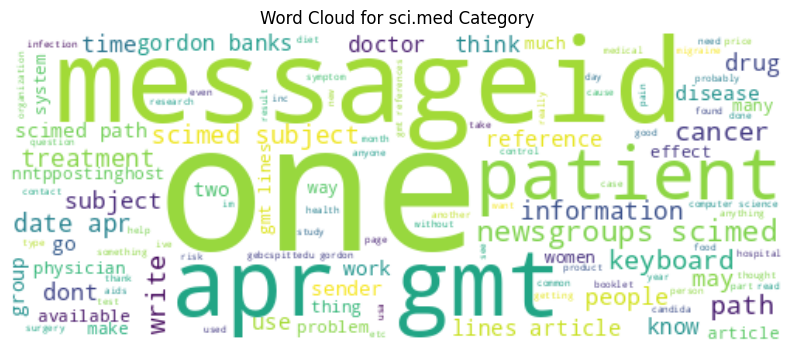

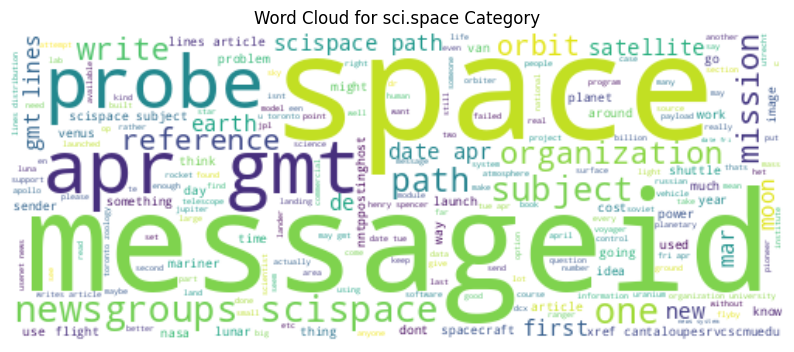

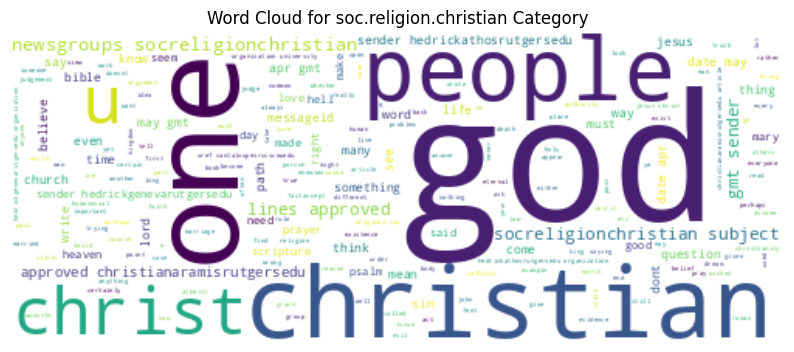

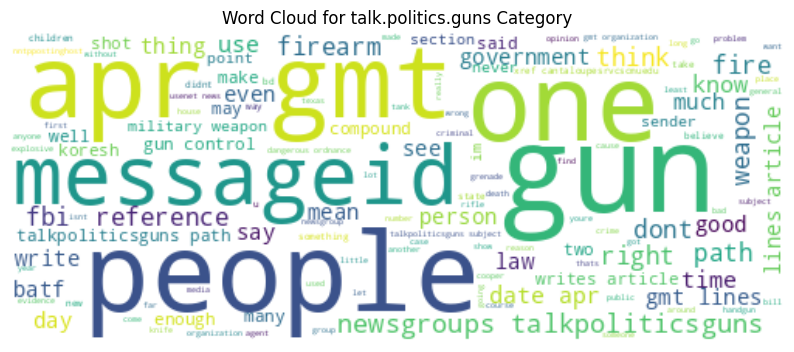

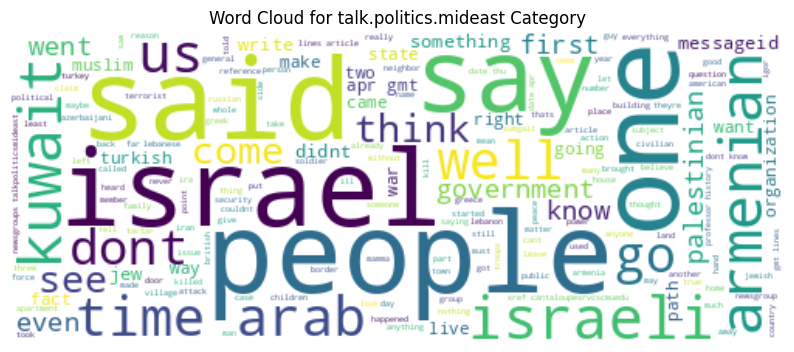

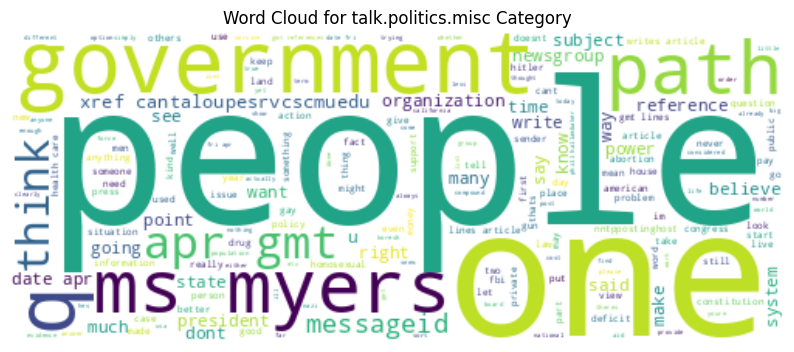

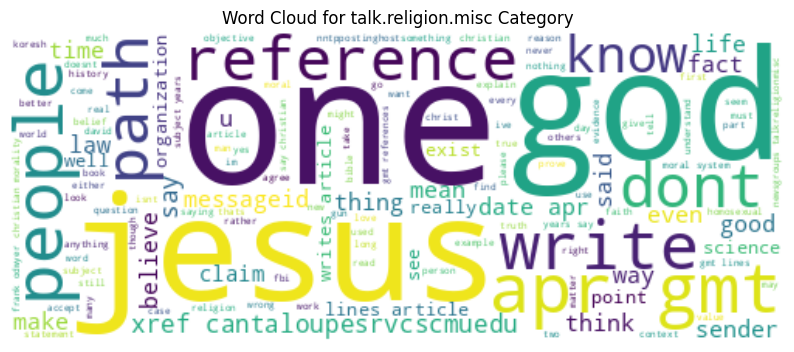

In [ ]:
# Word Clouds
!pip install seaborn wordcloud
from wordcloud import WordCloud

# Generate word cloud for each sentiment
for sentiment in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment'] == sentiment]['cleaned_data'])
    wordcloud = WordCloud(width=500, height=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

# Generate word cloud for each category
for category in df['Labels'].unique():
    text = ' '.join(df[df['Labels'] == category]['cleaned_data'])
    wordcloud = WordCloud(width=500, height=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Category')
    plt.show()

# 4. Evaluation

In [ ]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Step 2: Reflect on challenges and insights from both classification and sentiment analysis.

Accuracy: 0.82
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.59      0.62      0.61        16
                 sci.med       0.88      0.88      0.88     